# Support Vector Machines (SVM) for Concrete Strength Regression

### Imports and Data Loading

In [18]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Load and prepare data
def load_concrete_data():
    df = pd.read_excel('concrete_data.xls')
    X = df.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
    y = df['Concrete compressive strength(MPa, megapascals) ']
    return X, y

X, y = load_concrete_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X.describe()  # Display basic statistics of the dataset

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


Variable ranges, will need to be scaled with StandardScaler to apply to SVM

### Preprocessing and Setup

In [ ]:
preprocessor = StandardScaler()

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svr', SVR(kernel='rbf'))
])

# Define hyperparameters for grid search
param_grid = {
    'svr__C': [0.01, 0.1, 1, 10],
    'svr__gamma': [0.01, 0.1, 1, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.01, 0.1, 1, 10],
                         'svr__gamma': [0.01, 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [21]:
# Evaluate the model
y_pred = grid_search.predict(X_test)
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 7.283788958999986
R^2 Score: 0.7941114654873839


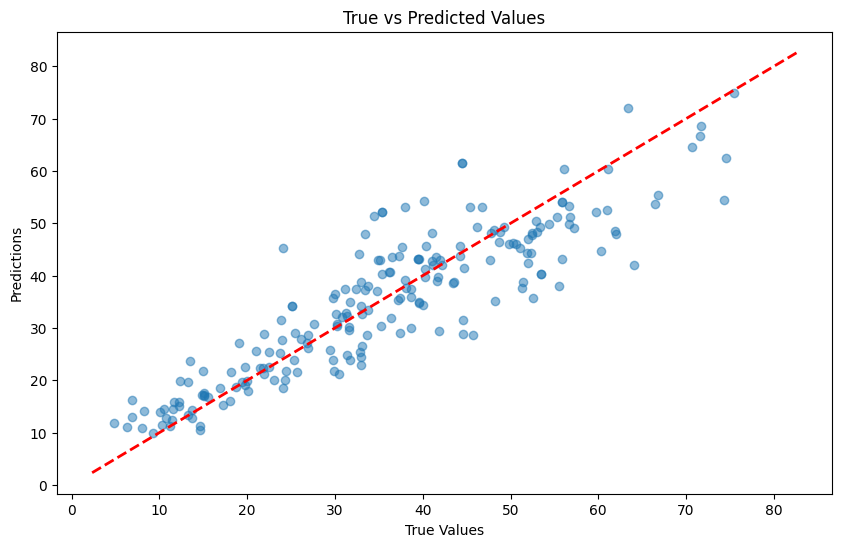

In [22]:
# plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()